# Data visualisation task 

**Additional information**  
[Cars93 metadata](https://jse.amstat.org/v1n1/datasets.lock.html) 

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load data
cars93_df = pd.read_csv('Cars93.csv')

In [3]:
# See column headings
cars93_df.columns

Index(['Unnamed: 0', 'Manufacturer', 'Model', 'Type', 'Min.Price', 'Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make'],
      dtype='object')

In [4]:
# Group by manufacturer
group_by_manufacturer = cars93_df.groupby(by=['Manufacturer'])

In [5]:
# Select both the Manufacturer and the RPM columns
just_manuf_RPM_df = group_by_manufacturer[['Manufacturer' ,'RPM']]

In [6]:
# Create the dataframe for the boxplot features
# Use isin to select the specific values for manufacturers required for the boxplot 
for_boxplot_manuf = cars93_df[cars93_df['Manufacturer'].isin(['Audi', 'Hyundai', 'Suzuki','Toyota'])]

### 1. Boxplot

<Axes: title={'center': 'RPM'}, xlabel='Manufacturer'>

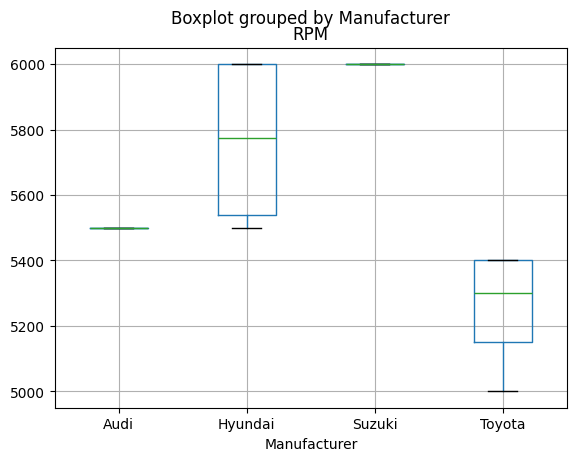

In [7]:
# Boxplot for revs per mile
# Use seaborn method '.boxplot()', to create chart
# Label x axes as Manufacturer, & title as RPM. Show grid.
for_boxplot_manuf.boxplot(by = "Manufacturer", column = [ "RPM"] , grid = True)

**Boxplot question:**  
Which of these manufacturers has the car with the highest revs per mile?


**Boxplot answer:**


From this boxplot, both Hyundai & Suzuki have the highest revs per mile. It is about 6000 revs per mile.

### 2. Histogram

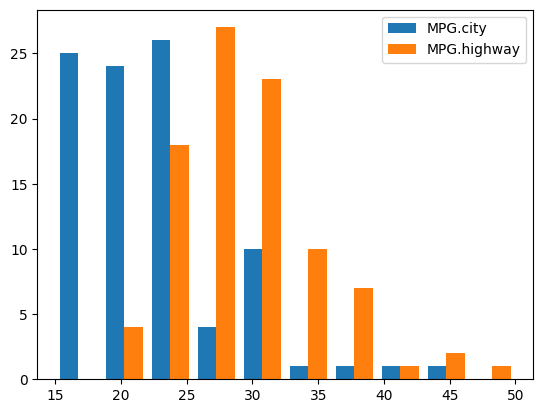

In [8]:
# Histogram of MPG
# Create dataframe for histogram of both MPG.city, & MPG.highway
for_histogram_mpg = cars93_df[['MPG.city', 'MPG.highway']]

# Use matplotlib histogram method to draw chart.
# 'bins=10' sets the width of the bars, 'label' sets the features in the legend 
plt.hist(for_histogram_mpg, bins=10, label=['MPG.city' , 'MPG.highway'])
plt.legend()      # prints a legend


**Histogram question:**  
Is it generally more fuel efficient to drive in the city or on the highway?

**Histogram answer:**

From the histogram above, the orange bars extend beyond the blue bars, with a max value at around 49 miles per gallon. The legend therefore tells us that the orange bars represent MPG.highway. So driving on the highway gives better mileage per gallon of fuel. 

### 3. Lineplot

<Axes: xlabel='Wheelbase', ylabel='Turn.circle'>

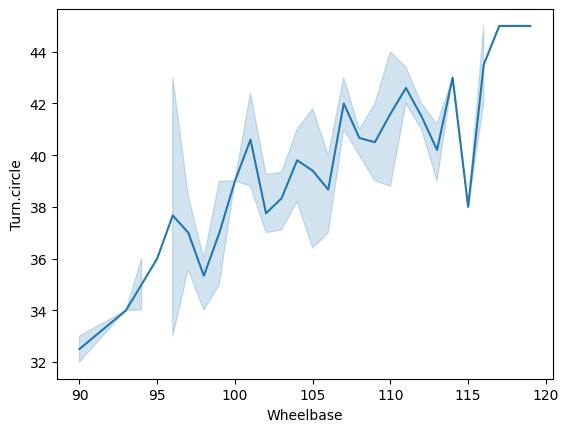

In [9]:
# Lineplot (Wheelbase vs turning circle)
# Creates a dataframe sorting the wheelbase values in ascending order
wheelbase = cars93_df.sort_values(by='Wheelbase', ascending=True)
for_lineplot_wbase_tcircle = wheelbase[['Wheelbase' , 'Turn.circle']] # Selects the turning circle & corresponding wheelbase values

# Plots the line plot; labelling the x and y axes
sns.lineplot(x='Wheelbase', y='Turn.circle', data=wheelbase)

**Lineplot question:**  
What is this relationship? What happens when the wheelbase gets larger?


**Lineplot answer:**  


From this lineplot, we can see that as the wheelbase gets larger, the turning circle also increases.

### 4. Barplot

In [10]:
# Barplot for mean horsepower

# Show all Type values
cars93_df['Type'].unique()

array(['Small', 'Midsize', 'Compact', 'Large', 'Sporty', 'Van'],
      dtype=object)

In [11]:
# Group data by Type
group_by_type = cars93_df.groupby(by=['Type'])

# Get the average for each type across all columns, including Horsepower
# 'round' is used to set values to 0 decimal places
cars93_avg = round(group_by_type.mean(numeric_only=True), 0) 


In [12]:
# Create dataframe for barplot using average Horsepower column
for_barplot_type_hp = pd.DataFrame({'Horsepower': cars93_avg['Horsepower']})

<Axes: xlabel='Type', ylabel='Average Horsepower'>

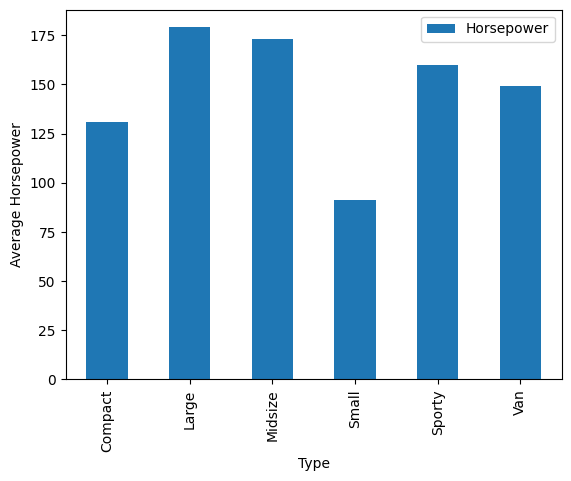

In [13]:
# Create barplot
# Use seaborn method to create barchart
# Set kind to bar for a barchart, & label y axes
for_barplot_type_hp.plot(kind='bar', ylabel="Average Horsepower")

**Barplot question:**  
Does a larger car mean more horsepower?



**Barplot answer:**

The barplot shows that the larger vehicle types, also have the greatest average horsepower.